# Visualization of Nigeria Malaria Dataset

This notebook use the Nigeria Malaria Indicator Survey (NMIS) dataset to perform some visualizations using python programming.

To start we have to load in the dataset and perform some data preparation.

In [23]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [24]:
# load datasets
Malaria = pd.read_csv('Numeric Malaria Data.csv')

In [25]:
Malaria.head()

,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [26]:
Malaria = pd.read_csv('Numeric Malaria Data.csv')
Malaria.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria.shape)
Malaria.head()

(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [27]:
#Check for Missing Values
(Malaria.astype(np.object).isnull()).any()

Case Identification                   False
Region                                False
Type of Place of Residence            False
Source of Drinking Water              False
Type of Toilet Facility                True
Has Electricity                       False
Main Floor Material                   False
Main Wall Material                    False
Main Roof Material                    False
Has Bicycle                           False
Has Motorcycle/Scooter                False
Has Car/Truck                         False
Has Mosquito Bed Net for Sleeping     False
Owns Land Suitable for Agriculture    False
Has Bank Account                      False
Wealth Index                          False
Cost of Treatment for Fever            True
State                                 False
dtype: bool

Column 'Cost of Treatment of Fever' containing NaN values is removed.

In [28]:
Malaria.drop('Cost of Treatment for Fever', axis = 1, inplace = True)

In [29]:
Malaria.head()

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,10


We would put the table in form of Pandas DataFrame.

In [39]:
df=pd.DataFrame (Malaria)

Now we would create and assign a list of dictionaries to recode the numerical values of SOME categorical variables in our dataset with human-readable text.

In [40]:
dict = [['Has Electricity',
        {1:'yes',
        0:'No'}],
       ['Type of Place of Residence',
       {1:'Urban',
       2:'Rural'}]]
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [41]:
dict = [['Source of Drinking Water',
        {10:'Piped water',
         11:'Piped into dwelling',
         12:'Piped to yard/plot',
         13:'public tap/standpipe',
         14:'Piped to Neighbour',
         20:'Tube well water',
         21:'Tube well or borehole',
         30:'Dug well (open/protected)',
         31:'Protected well',
         32:'Unprotected well',
         40:'Surface water',
         41:'Protected spring',
         42:'Unprotected spring',
         43:'River/dam/lake/ponds/stream/canal/irrigation channel',
         51:'Rain water',
         61:'Tanker truck',
         62:'Cart with small tank',
         71:'Bottled water',
         72:'Sachet water',
         96:'Other'}]]

for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [42]:
dict = [['Region',
       {1:'North central',
        2:'North east',
        3:'North west',
        4:'South east',
        5:'South south',
        6:'South west'}]]
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [43]:
dict = [['State',
        {10:'Sokoto',
        20:'Zamfara',
        30:'Katsina',
        40:'Jigawa',
        50:'Yobe',
        60:'Borno-Urban',
        70:'Adamawa',
        80:'Gombe',
        90:'Bauchi',
        100:'Kano',
        110:'Kaduna',
        120:'Kebbi',
        130:'Niger',
        140:'FCT Abuja',
        150:'Nasarawa',
        160:'Plateau',
        170:'Taraba',
        180:'Benue',
        190:'Kogi',
        200:'Kwara',
        210:'Oyo',
        220:'Osun',
        230:'Ekiti',
        240:'Ondo',
        250:'Edo',
        260:'Anambra',
        270:'Enugu',
        280:'Ebonyi',
        290:'Cross River',
        300:'Akwa Ibom',
        310:'Abia',
        320:'Imo',
        330:'Rivers',
        340:'Bayelsa',
        350:'Delta',
        360:'Lagos',
        370:'Ogun'}]]

for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [44]:
dict = [['Has Bank Account',
        {1:'yes',
         0: 'No'}], 
         ['Has Bicycle',
         {1:'yes',
         0:'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [45]:
dict = [['Has Mosquito Bed Net for Sleeping',
        {1:'yes',
         0: 'No'}], 
         ['Has Car/Truck',
         {1:'yes',
         0:'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [46]:
dict = [['Wealth Index',
        {1:'Poorest',
         2:'Poorer',
         3:'Middle',
         4:'Richer',
         5:'Richest'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [47]:
dict = [['Has Motorcycle/Scooter',
        {1:'yes',
         0: 'No'}]]         
        
for col_dict in dict:
    col=col_dict[0]
    dict=col_dict[1]
    df[col]=[dict[x] for x in df[col]]

In [48]:
df

,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,North west,Urban,Protected well,21.0,yes,34,31,31,No,No,No,yes,1,No,Richer,Sokoto
1,1004,North west,Urban,Tanker truck,21.0,yes,22,31,31,yes,No,yes,yes,1,yes,Richer,Sokoto
2,1007,North west,Urban,Tube well or borehole,21.0,yes,34,31,31,No,yes,No,yes,0,No,Richer,Sokoto
3,1010,North west,Urban,Tube well or borehole,21.0,yes,34,31,31,yes,yes,yes,yes,0,No,Richest,Sokoto
4,1013,North west,Urban,Tanker truck,21.0,yes,33,31,31,No,yes,yes,yes,0,yes,Richest,Sokoto
5,1016,North west,Urban,Tube well or borehole,21.0,yes,21,25,31,No,yes,No,yes,1,yes,Richer,Sokoto
6,1019,North west,Urban,Tube well or borehole,21.0,yes,34,24,31,No,No,yes,yes,0,yes,Richest,Sokoto
7,1022,North west,Urban,Tanker truck,21.0,yes,34,31,31,No,yes,No,yes,0,yes,Richest,Sokoto
8,1025,North west,Urban,Tanker truck,21.0,yes,34,31,31,No,yes,No,yes,0,yes,Richest,Sokoto
9,1027,North west,Urban,Tube well or borehole,22.0,yes,34,31,31,No,No,No,No,0,No,Richer,Sokoto


Fine with the missing values check and recoding of some categorical variables. Now on to visualizing the dataset.

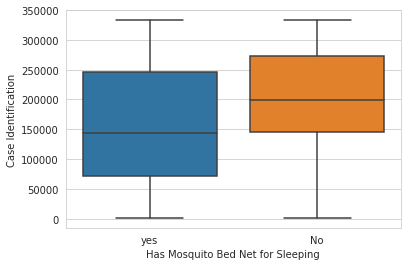

In [49]:
def plot_box(df, cols, col_x = 'Has Mosquito Bed Net for Sleeping'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Case Identification']
plot_box(df, num_cols)

From the boxplot above, there is obvious gap in the number of people who indicated having no Mosquito Bed Net for Sleeping and those who indicated they have. 

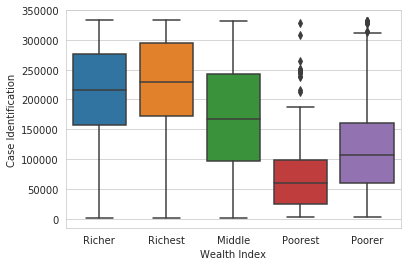

In [50]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Wealth Index')    

From the box plot, the gap between Richer and Richest is not obvious. While the gap between the Middle, Poorest and Poorer is very obvious.

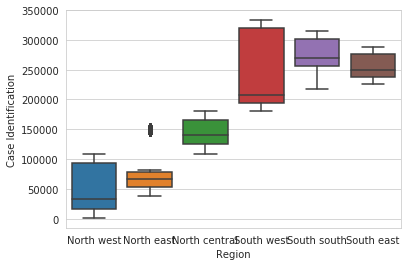

In [52]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Region')    

As expected regions are distinct from each other.

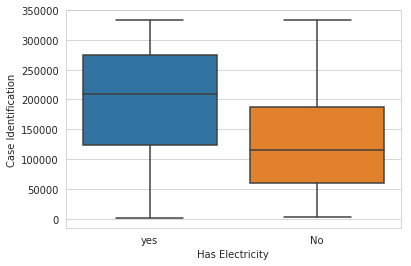

In [57]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Has Electricity')    

There is obvious difference in the number of people having and not having electricity.

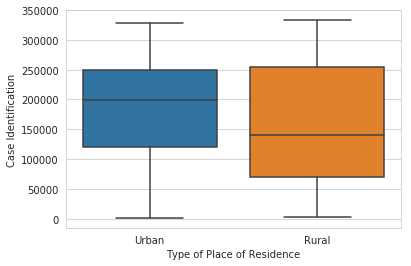

In [56]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Type of Place of Residence')    

As expected type of places of residence is also obviously distinct. 

The interpretation of the violin plots is similar to the box plots. However, a bit more detail on distributions is visible. Notice also that a type of box plot is visible inside each violin plot.

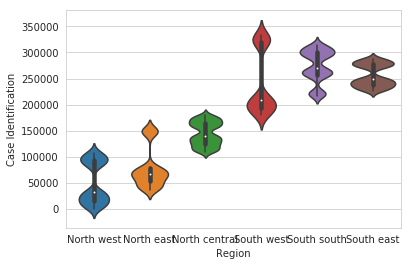

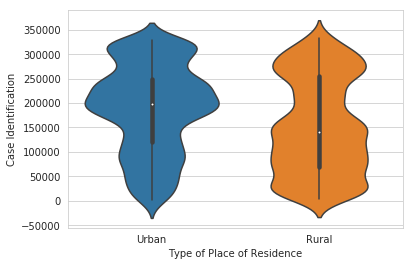

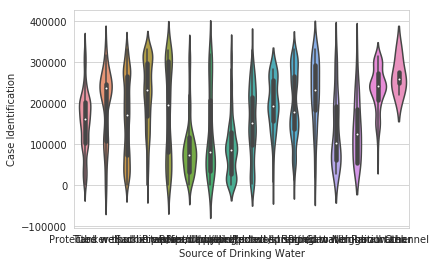

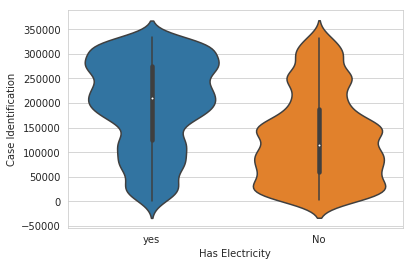

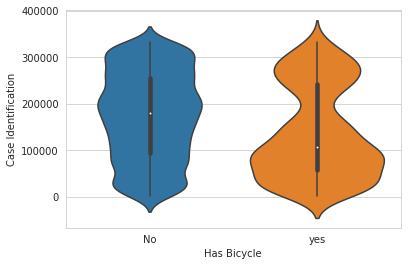

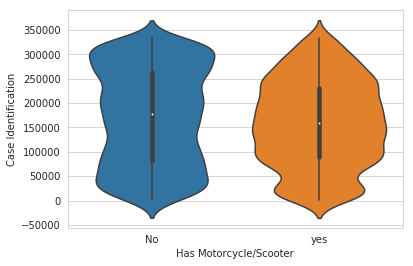

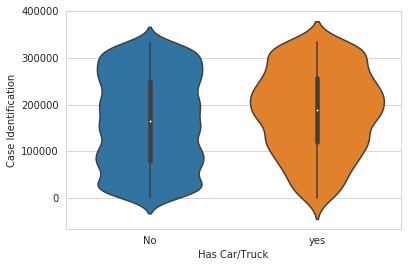

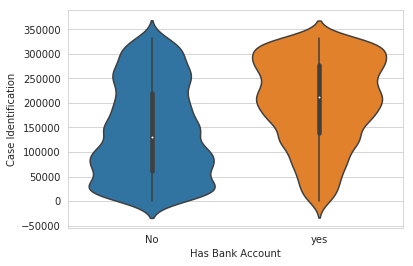

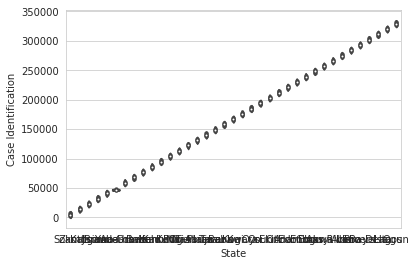

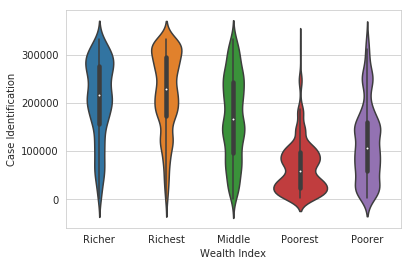

In [59]:
def plot_violin(df, cols, col_y = 'Case Identification'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(df, cat_cols)    